# Control óptimo para un modelo SIR determinista multipoblacional

## Francisco Valentín Valerio López
## Facultad de Ciencias Físico Matemáticas - Benemérita Universidad Autónoma de Puebla

### Introducción

Como se había mencionado en la [primera notebook](https://github.com/FranzValerio/Stochastic-epidemic-control/tree/main/Notebooks),  buscamos resolver un problema de control óptimo para reducir la tasa de contagio en un modelo SIR multipoblacional estocástico. Primero comenzamos con el caso más simple: el modelo SIR determinista de una población.

Recordemos que el modelo SIR determinista con un término de control en la tasa de contagio para una población de $N$ personas está dado por:

$$
    \begin{split}
        \frac{dS}{dt} &= -(1-u) \beta S I \\
        \frac{dI}{dt} &= (1-u) \beta S I - \gamma I \\
        \frac{dR}{dt} &= \gamma I \\
    \end{split} \tag{1}
$$

donde $u(t)$ es la estrategia de control aplicada sobre el sistema. 

Ahora nos extendemos al caso en el que se considera la *estructura espacial* de la población. Consideramos una población dividida en $n$ subpoblaciones, o *parches*, cada una con su propia dinámica de propagación. Esto puede representar, por ejemplo, la estructura poblacional de diferentes ciudades, regiones o grupos demográficos en un país.

<div style="text-align: center">
    <figure>
        <img src='https://i.postimg.cc/J4gxH46W/map.jpg' width='600' height='400' /> <br>
        <figcaption> Esquema que representa el flujo de habitantes en una población espacialmente estructurada.</figcaption>
    </figure>
</div>

Cada parche tiene términos de control que pueden variar con el tiempo, los cuales influyen en las tasas de contacto de cada región. Las ecuaciones diferenciales que describen este caso son una extensión del sistema (1), ya que incorporan los términos que representan el movimiento de los individuos entre los parches.

Para $i=1,2,...,n$ subpoblaciones, tenemos:

$$
    \begin{split}
    \frac{dS_i}{dt} &= -(1-u_i) \beta_i S_i \sum_{j=1}^n m_{ij} I_j \\
    \frac{dI_i}{dt} &= (1-u_i) \beta_i S_i \sum_{j=1}^n m_{ij} I_j - \gamma_i I_i \\
    \frac{dR_i}{dt} &= \gamma_i I_i \\
    \end{split} \tag{2}
$$

donde el término $\sum_{j=1}^n m_{ij} I_j$ encapsula la contribución del $j$-ésimo parche a la tasa de infección del $i$-ésimo parche. $m_{ij}$ es la fracción de la población de $i$ que se encuentra en el parche $j$. 

El modelo (2) se conoce como el [*modelo epidemiológico SIR multipoblacional con control en la tasa de transmisión*](https://www.pnas.org/doi/10.1073/pnas.2007488118). 

La metodología para resolver el problema de encontrar las políticas de control óptimo para cada parche es la misma que la utilizada para el caso del modelo SIR para una población. Para ilustrarlo, consideremos que tenemos $n=2$ subpoblaciones. En ese caso la dinámica del sistema está dada por:

$$
    \begin{split}
        \frac{dS_1}{dt} &= -(1-u_1) \beta_1 S_1 \left( m_{11} I_1 + m_{12} I_2 \right) \\
        \frac{dI_1}{dt} &= (1-u_1) \beta_1 S_1 \left( m_{11} I_1 + m_{12} I_2 \right) - \gamma_1 I_1 \\
        \frac{dR_1}{dt} &= \gamma_1 I_1 \\
        \frac{dS_2}{dt} &= -(1-u_2) \beta_2 S_2 \left( m_{21} I_1 + m_{22} I_2 \right) \\
        \frac{dI_2}{dt} &= (1-u_2) \beta_2 S_2 \left( m_{21} I_1 + m_{22} I_2 \right) - \gamma_2 I_2 \\
        \frac{dR_2}{dt} &= \gamma_2 I_2 \\
    \end{split} \tag{3}
$$

Proponemos la misma forma para la función de costo instantáneo:

$$ g(I_1, I_2, u_1, u_2, t) = a_1 I_1^2 + a_2 I_2^2 + b_1 u_1^2 + b_2 u_2^2 \quad a_i, b_i \in \mathbb{R} \quad \text{con} \quad i = 1,2\tag{4} $$

Nuevamente consideramos la ecuación de Hamilton-Jacobi-Bellman:

$$ 
    \frac{\partial J}{\partial t} + \min_{u \in \mathcal{U}} \Big\{ g(I_i, u_i) + f(S_i, I_i, t)^T \cdot \nabla J(S_i, I_i, t) \Big\} = 0 \tag{5} 
$$

Aplicando el principio de optimalidad de Bellman, podemos obtener a las estrategias de control óptimo para los parches 1 y 2:

$$
    \boxed{
    u_1^* = - \frac{\beta_1 S_1 \left( m_{11} I_1 + m_{12} I_2 \right)}{2 b_1} \left( \frac{\partial J}{\partial S_1} - \frac{\partial J}{\partial I_1} \right) } \tag{6}
$$

y

$$
    \boxed{
    u_2^* = - \frac{\beta_2 S_2 \left( m_{21} I_1 + m_{22} I_2 \right)}{2 b_2} \left( \frac{\partial J}{\partial S_2} - \frac{\partial J}{\partial I_2} \right) } \tag{7}
$$

Al sustituir las expresiones (6) y (7) en la ecuación (5), obtenemos la ecuación de HJB a resolver:

$$  \boxed{
    \begin{split}
    & \frac{\partial J}{\partial t} + a_1 I_1^2 + a_2 I_2^2 - \frac{(\beta_1 S_1)^2}{2 b_1} (m_{11} I_1 + m_{12} I_2)^2 \left[ \frac12 \left( \left( \frac{\partial J}{\partial S_1} \right)^2 + \left( \frac{\partial J}{\partial I_1} \right)^2 \right) - \frac{\partial J}{\partial S_1} \frac{\partial J}{\partial I_1} \right] \\
    & - \frac{(\beta_2 S_2)^2}{2 b_2} (m_{21} I_1 + m_{22} I_2)^2 \left[ \frac12 \left( \left( \frac{\partial J}{\partial S_2} \right)^2 + \left( \frac{\partial J}{\partial I_2} \right)^2 \right) - \frac{\partial J}{\partial S_2} \frac{\partial J}{\partial I_2} \right] \\
    & + \beta_1 S_1 (m_{11} I_1 + m_{12} I_2) \left( \frac{\partial J}{\partial I_1} - \frac{\partial J}{\partial S_1} \right) - \gamma_1 I_1 \frac{\partial J}{\partial I_1} + \beta_2 S_2 (m_{21} I_1 + m_{22} I_2) \left( \frac{\partial J}{\partial I_2} - \frac{\partial J}{\partial S_2} \right) - \gamma_2 I_2 \frac{\partial J}{\partial I_2} = 0\\
    \end{split}} \tag{8}
$$

De la misma manera, podemos obtener la solución para la función de costo $J(S,I,t)$ utilizando una PINN, después utilizar el modelo entrenado para calcular las estrategias de control óptimo de acuerdo a (6) y (7), y finalmente realizar una simulación para observar el efecto de las políticas de control.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D
from tensorflow.keras.optimizers import RMSprop, Adam

In [2]:
# Parámetros: epochs, a_i, b_i, beta_i, gamma_i, puntos de entrenamiento

epochs = 2500

a = np.array([5.0, 6.0])

b = np.array([1.5, 2.5])

beta = np.array([2.4, 2.9])

gamma = np.array([1.9, 1.7])

m = np.array([[0.6, 0.4],
             [0.2, 0.8]])

points = 5000

In [3]:
class HJB_SIR_Meta(Sequential):

    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.loss_tracker = keras.metrics.Mean(name = 'Loss')
        self.j_tracker = keras.metrics.Mean(name = 'J')

    @property
    def metrics(self):
        return [self.loss_tracker, self.j_tracker]

    def train_step(self, data):
        S = tf.random.uniform((points, 2), minval = 0, maxval = 1)
        I = tf.random.uniform((points, 2), minval = 0, maxval = 1)
        t = tf.zeros((points, 1), dtype = tf.float32)

        batch_size = tf.shape(S)[0]

        with tf.GradientTape(persistent = True) as tape:

            tape.watch(S)
            tape.watch(I)
            tape.watch(t)

            J = self(tf.concat([S, I, t * tf.ones((batch_size, 1))], axis = 1))

            [dJ_dS, dJ_dI] = tape.gradient(J, [S, I])

            dJ_dt = tape.gradient(J, t)

            S0 = tf.zeros((batch_size, 2))
            I0 = tf.zeros((batch_size, 2))
            ic = tf.concat([S0, I0], axis = 1)

            hjb = 10*(dJ_dt + a[0]*I[:,0]**2 + a[1]*I[:,1]**2
            - (beta[0]*S[:,0]*(m[0,0]*I[:,0]+m[0,1]*I[:,1]))**2 * (1/(2*b[0])) * ((1/2) * (dJ_dS[:,0]**2 + dJ_dI[:,0]**2) - dJ_dS[:,0] * dJ_dI[:,0])
            - (beta[1]*S[:,1]*(m[1,0]*I[:,0]+m[1,1]*I[:,1]))**2 * (1/(2*b[1])) * ((1/2) * (dJ_dS[:,1]**2 + dJ_dI[:,1]**2) - dJ_dS[:,1] * dJ_dI[:,1])
            + (beta[0]*S[:,0]*(m[0,0]*I[:,0]+m[0,1]*I[:,1])) * (dJ_dI[:,0] - dJ_dS[:,0]) - (gamma[0] * I[:,0]) * dJ_dI[:,0]
            + (beta[1]*S[:,1]*(m[1,0]*I[:,0]+m[1,1]*I[:,1])) * (dJ_dI[:,1] - dJ_dS[:,1]) - (gamma[1] * I[:,1]) * dJ_dI[:,1])

            loss_function = keras.losses.mean_squared_error(0., hjb) + keras.losses.mean_squared_error(0., ic)
    
        grads = tape.gradient(loss_function, self.trainable_variables)
        self.optimizer.apply_gradients(zip(grads, self.trainable_variables))
        self.loss_tracker.update_state(loss_function)
        self.j_tracker.update_state(J)

        return {'Función de pérdida': self.loss_tracker.result(), 'J': self.j_tracker.result()}

In [4]:
modelo = HJB_SIR_Meta()

modelo.add(Dense(40, activation = 'tanh', input_shape = (5,)))
modelo.add(Dense(35, activation = 'tanh'))
modelo.add(Dense(30, activation = 'tanh'))
modelo.add(Dense(25, activation = 'tanh'))
modelo.add(Dense(20, activation = 'tanh'))
modelo.add(Dense(15, activation = 'tanh'))
modelo.add(Dense(10, activation = 'tanh'))
modelo.add(Dense(5, activation = 'tanh'))
modelo.add(Dense(1, activation = 'exponential'))

In [5]:
modelo.summary()

Model: "hjb_sir__meta"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 40)                240       
                                                                 
 dense_1 (Dense)             (None, 35)                1435      
                                                                 
 dense_2 (Dense)             (None, 30)                1080      
                                                                 
 dense_3 (Dense)             (None, 25)                775       
                                                                 
 dense_4 (Dense)             (None, 20)                520       
                                                                 
 dense_5 (Dense)             (None, 15)                315       
                                                                 
 dense_6 (Dense)             (None, 10)              

In [6]:
modelo.compile(optimizer = RMSprop(learning_rate = 0.0001), metrics = ['Loss'])

In [7]:
X = np.random.randint(0, 1000, size = (points, 5))

Y = np.zeros((points, 1))

In [8]:
start_time = time.time()

history = modelo.fit(X, Y, epochs = epochs, batch_size = 250, verbose = 0)

end_time = time.time()

In [9]:
training_time = end_time - start_time

print(f'Tiempo de entrenamiento: {np.round(training_time,2)} s')
print(f'Tiempo de entrenamiento: {np.round(training_time/60,2)} min')


Tiempo de entrenamiento: 1450.58 s
Tiempo de entrenamiento: 24.18 min


#### Resultados del entrenamiento

In [10]:
print('Valor mínimo de la función de pérdida de la red: ', np.min(np.round(history.history['Función de pérdida'], 3)))

Valor mínimo de la función de pérdida de la red:  0.363


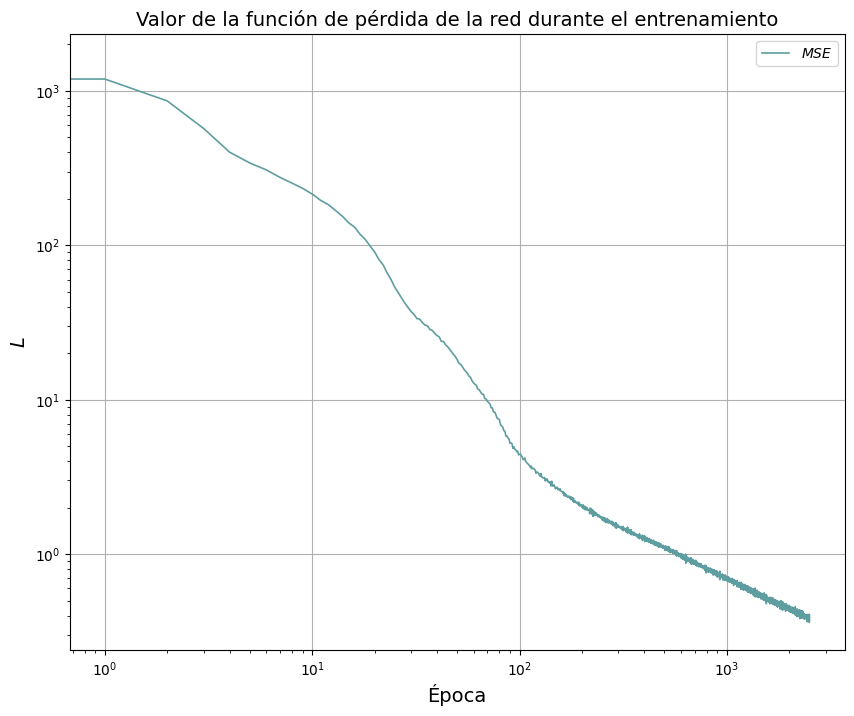

In [11]:
fig, ax = plt.subplots(1, 1, figsize = (10,8), dpi = 100)
ax.loglog(history.history['Función de pérdida'], lw = 1.2, color = 'cadetblue', label = r'$MSE$')
ax.set_title('Valor de la función de pérdida de la red durante el entrenamiento', fontsize = 14)
ax.set_xlabel('Época', fontsize = 14)
ax.set_ylabel(r'$L$', fontsize = 14)
ax.legend()
ax.grid()
plt.show()

#### Cálculo de controles

In [12]:
def u_1(S1, I1, S2, I2, modelo):

    with tf.GradientTape(persistent = True) as tape:

        tape.watch(S1)
        tape.watch(I1)
        tape.watch(S2)
        tape.watch(I2)

        J = modelo(tf.concat([S1, I1, S2, I2, tf.zeros_like(S1)], axis = 1))

        [dJ_dS1, dJ_dI1, dJ_dS2, dJ_dI2] = tape.gradient(J, [S1, I1, S2, I2])

        u1 = tf.math.abs((-beta[0] * S1 * (m[0,0] * I1 + m[0,1] * I2))/(2 * b[0]) * (dJ_dS1 - dJ_dI1))

    return u1


def u_2(S1, I1, S2, I2, modelo):

    with tf.GradientTape(persistent = True) as tape:

        tape.watch(S1)
        tape.watch(I1)
        tape.watch(S2)
        tape.watch(I2)

        J = modelo(tf.concat([S1, I1, S2, I2, tf.zeros_like(S1)], axis = 1))

        [dJ_dS1, dJ_dI1, dJ_dS2, dJ_dI2] = tape.gradient(J, [S1, I1, S2, I2])

        u2 = tf.math.abs((-beta[1] * S2 * (m[1,0] * I1 + m[1,1] * I2))/(2 * b[1]) * (dJ_dS2 - dJ_dI2))

    return u2


#### Simulación del modelo

In [13]:
# Población total

N_pob = np.array([1000, 850])

# Condiciones iniciales

S0 = np.array([999, 849])/N_pob
I0 = (N_pob - S0)/N_pob
R0 = np.array([0.0, 0.0])

dt = 0.001

t_max = 15

l = int(t_max/dt) + 1

S = np.zeros((l, 2))
I = np.zeros((l, 2))
R = np.zeros((l, 2))
u = np.zeros((l, 2))

S[0, :] = S0 * N_pob
I[0, :] = I0 * N_pob
R[0, :] = R0 * N_pob

sim_start = time.time()

for i in range(1, l):

    u[i,0] = u_1(tf.constant([[S[i-1, 0]]], dtype = tf.float32),
                tf.constant([[I[i-1, 0]]], dtype = tf.float32),
                tf.constant([[S[i-1, 1]]], dtype = tf.float32),
                tf.constant([[I[i-1, 1]]], dtype = tf.float32), modelo)

    u[i,1] = u_2(tf.constant([[S[i-1, 0]]], dtype = tf.float32),
                tf.constant([[I[i-1, 0]]], dtype = tf.float32),
                tf.constant([[S[i-1, 1]]], dtype = tf.float32),
                tf.constant([[I[i-1, 1]]], dtype = tf.float32), modelo)
    
    for j in range(2):

        dS = -(1-u[i,j]) * beta[j] * S[i-1, j] * ((m[j,0] * I[i-1, 0] + m[j,1] * I[i-1, 1])/N_pob[j])
        dI = (1-u[i,j]) * beta[j] * S[i-1, j] * ((m[j,0] * I[i-1, 0] + m[j,1] * I[i-1, 1])/N_pob[j]) - gamma[j] * I[i-1, j]
        dR = gamma[j] * I[i-1, j]

        S[i,j] = S[i-1, j] + dS * dt
        I[i,j] = I[i-1, j] + dI * dt
        R[i,j] = R[i-1, j] + dR * dt 
    
    if i % 1000 == 0:  # imprimir cada 1000 pasos
        print(f"Step {i}: S = {S[i,:]}, I = {I[i,:]}, R = {R[i,:]}")

Step 1000: S = [900.12773645 757.85008025], I = [915.29396172 798.68565258], R = [182.57930183 141.46544364]
Step 2000: S = [820.01640002 692.77262907], I = [829.7529335  733.58710025], R = [348.23166648 271.64144715]
Step 3000: S = [747.24576383 633.36812406], I = [752.33962363 673.45585426], R = [498.41561254 391.17719815]
Step 4000: S = [681.13930983 579.14801035], I = [682.26265671 617.96407269], R = [634.59903346 500.88909343]
Step 5000: S = [621.07889896 529.66428688], I = [618.81441485 566.79778315], R = [758.10768618 601.53910643]
Step 6000: S = [566.50777423 484.50705188], I = [561.35415203 519.65731107], R = [870.13907374 693.83681352]
Step 7000: S = [516.92054383 443.30030517], I = [509.30520623 476.25858405], R = [971.77524994 778.44228725]
Step 8000: S = [471.86028641 405.70003768], I = [462.14664358 436.33258494], R = [1063.99407001  855.96855386]
Step 9000: S = [430.91301048 371.38990481], I = [419.40862439 399.6269525 ], R = [1147.67936513  926.98431916]
Step 10000: S =

In [14]:
sim_end = time.time()

sim_time = sim_end - sim_start

print(f'Tiempo de simulación: {np.round(sim_time,2)} s')
print(f'Tiempo de simulación: {np.round(sim_time/60,2)} min')

Tiempo de entrenamiento: 3065.78 s
Tiempo de entrenamiento: 51.1 min


In [15]:
# Sin control

S_no = np.zeros((l, 2))
I_no = np.zeros((l, 2))
R_no = np.zeros((l, 2))

S_no[0, :] = S0 * N_pob
I_no[0, :] = I0 * N_pob
R_no[0, :] = R0 * N_pob

for i in range(1, l):
    for j in range(2):
        dS_no = -beta[j] * S_no[i-1, j] * ((m[j,0] * I_no[i-1, 0] + m[j,1] * I_no[i-1, 1])/N_pob[j])
        dI_no = beta[j] * S_no[i-1, j] * ((m[j,0] * I_no[i-1, 0] + m[j,1] * I_no[i-1, 1])/N_pob[j]) - gamma[j] * I_no[i-1, j]
        dR_no = gamma[j] * I_no[i-1, j]

        S_no[i,j] = S_no[i-1, j] + dS_no * dt
        I_no[i,j] = I_no[i-1, j] + dI_no * dt
        R_no[i,j] = R_no[i-1, j] + dR_no * dt


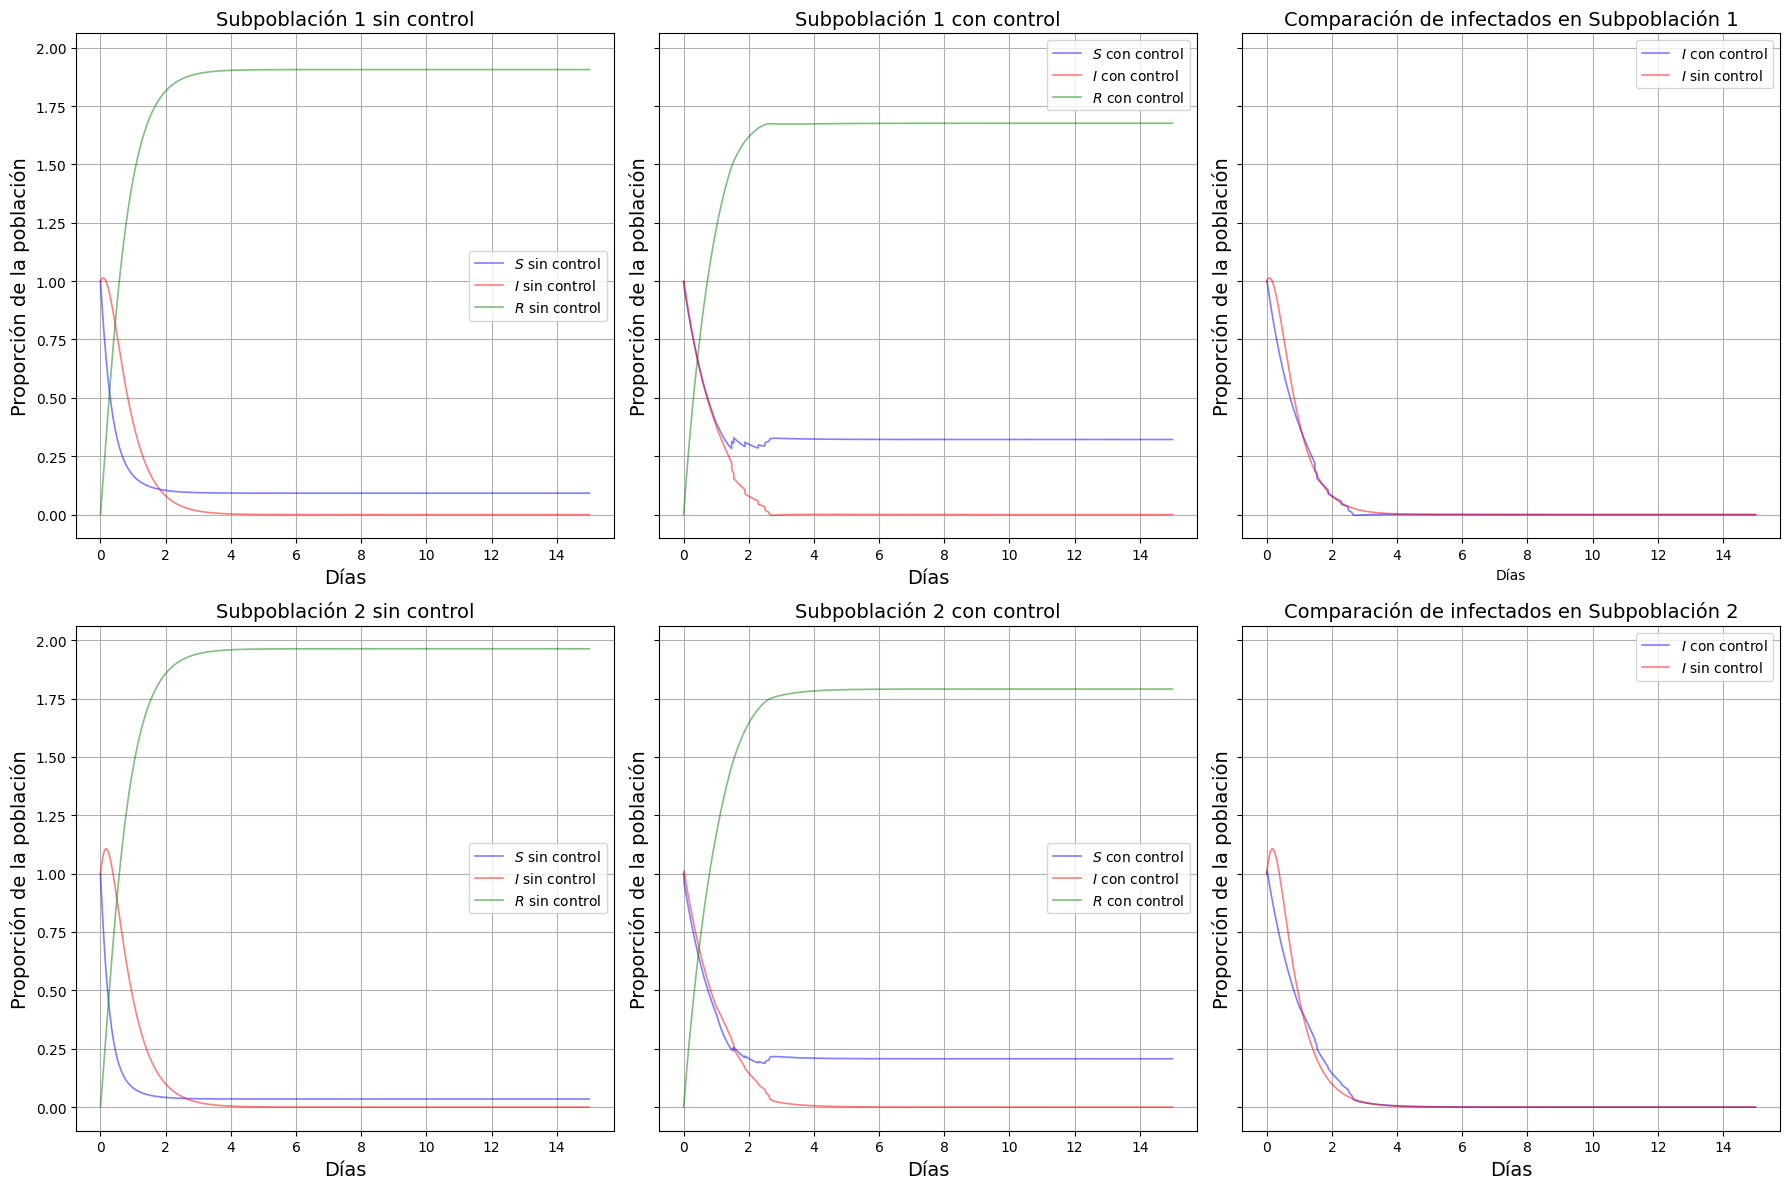

In [16]:
# Graficar los resultados
t = np.linspace(0, t_max, len(S))
fig, axs = plt.subplots(2, 3, figsize=(18,12), dpi = 100, sharey = True)

# Subpoblación 1
axs[0,0].plot(t, S_no[:,0]/N_pob[0], 'b', alpha=0.5, lw=1.2, label=r'$S$ sin control')
axs[0,0].plot(t, I_no[:,0]/N_pob[0], 'r', alpha=0.5, lw=1.2, label=r'$I$ sin control')
axs[0,0].plot(t, R_no[:,0]/N_pob[0], 'g', alpha=0.5, lw=1.2, label=r'$R$ sin control')
axs[0,0].set_xlabel('Días', fontsize = 14)
axs[0,0].set_ylabel('Proporción de la población', fontsize = 14)
axs[0,0].set_title('Subpoblación 1 sin control', fontsize = 14)
axs[0,0].grid()
axs[0,0].legend()

axs[0,1].plot(t, S[:,0]/N_pob[0], 'b', alpha=0.5, lw=1.2, label=r'$S$ con control')
axs[0,1].plot(t, I[:,0]/N_pob[0], 'r', alpha=0.5, lw=1.2, label=r'$I$ con control')
axs[0,1].plot(t, R[:,0]/N_pob[0], 'g', alpha=0.5, lw=1.2, label=r'$R$ con control')
axs[0,1].set_xlabel('Días', fontsize = 14)
axs[0,1].set_ylabel('Proporción de la población', fontsize = 14)
axs[0,1].set_title('Subpoblación 1 con control', fontsize = 14)
axs[0,1].grid()
axs[0,1].legend()

axs[0,2].plot(t, I[:,0]/N_pob[0], 'b', alpha=0.5, lw=1.2, label=r'$I$ con control')
axs[0,2].plot(t, I_no[:,0]/N_pob[0], 'r', alpha=0.5, lw=1.2, label=r'$I$ sin control')
axs[0,2].set_xlabel('Días')
axs[0,2].set_ylabel('Proporción de la población', fontsize = 14)
axs[0,2].set_title('Comparación de infectados en Subpoblación 1', fontsize = 14)
axs[0,2].grid()
axs[0,2].legend()

# Subpoblación 2
axs[1,0].plot(t, S_no[:,1]/N_pob[1], 'b', alpha=0.5, lw=1.2, label=r'$S$ sin control')
axs[1,0].plot(t, I_no[:,1]/N_pob[1], 'r', alpha=0.5, lw=1.2, label=r'$I$ sin control')
axs[1,0].plot(t, R_no[:,1]/N_pob[1], 'g', alpha=0.5, lw=1.2, label=r'$R$ sin control')
axs[1,0].set_xlabel('Días', fontsize = 14)
axs[1,0].set_ylabel('Proporción de la población', fontsize = 14)
axs[1,0].set_title('Subpoblación 2 sin control', fontsize = 14)
axs[1,0].grid()
axs[1,0].legend()

axs[1,1].plot(t, S[:,1]/N_pob[1], 'b', alpha=0.5, lw=1.2, label=r'$S$ con control')
axs[1,1].plot(t, I[:,1]/N_pob[1], 'r', alpha=0.5, lw=1.2, label=r'$I$ con control')
axs[1,1].plot(t, R[:,1]/N_pob[1], 'g', alpha=0.5, lw=1.2, label=r'$R$ con control')
axs[1,1].set_xlabel('Días', fontsize = 14)
axs[1,1].set_ylabel('Proporción de la población', fontsize = 14)
axs[1,1].set_title('Subpoblación 2 con control', fontsize = 14)
axs[1,1].grid()
axs[1,1].legend()

axs[1,2].plot(t, I[:,1]/N_pob[1], 'b', alpha=0.5, lw=1.2, label=r'$I$ con control')
axs[1,2].plot(t, I_no[:,1]/N_pob[1], 'r', alpha=0.5, lw=1.2, label=r'$I$ sin control')
axs[1,2].set_xlabel('Días', fontsize = 14)
axs[1,2].set_ylabel('Proporción de la población', fontsize = 14)
axs[1,2].set_title('Comparación de infectados en Subpoblación 2', fontsize = 14)
axs[1,2].grid()
axs[1,2].legend()

plt.tight_layout()
plt.show()

In [19]:
modelo.save('modelo_sir_multi.h5')